In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/My Drive/winno_data"

/content/drive/.shortcut-targets-by-id/165plmCQgCNweKAK91WDFdf2qJ_UPUCcv/winno_data


## Preprocessed stuffs
not needed now

In [ ]:
import pandas as pd

data = pd.read_json("WLASL_v0.3.json")
data

In [ ]:


f = open("out.csv", "w")

f.write("video_id,label\n")

for index, label in enumerate(data["gloss"]):
  for video_obj in data["instances"][index]:
    f.write("%s,%s\n" %(video_obj["video_id"], label))

f.close()


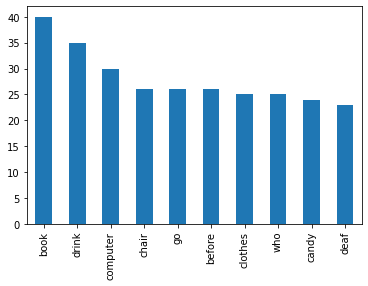

In [ ]:
dat = pd.read_csv("out.csv")
dat["label"].value_counts()[:10].plot(kind='bar')

In [ ]:
list(dat["label"].value_counts()[:10])

[40, 35, 30, 26, 26, 26, 25, 25, 24, 23]

In [ ]:
dat["label"].value_counts().to_csv("label_counts.csv", index=True)

In [ ]:
missing = open("missing.txt", "r").readlines()
missing = [x.strip() for x in missing]

f = open("out.csv", "r")
out = open("dataset.csv", "w")
out.write("video_path,label\n")

for line in f.readlines()[1:]:
  if line.split(',')[0] not in missing:
    #out.write(line)
    out.write("%s,%s\n" %('/content/drive/MyDrive/winno_data/videos/' + line.split(',')[0] +'.mp4', line.split(',')[1].strip()))
out.close()
f.close()


In [ ]:
filter_dat = pd.read_csv("out_with_filter.csv")
filter_dat["label"].value_counts().to_csv("label_counts_with_filter.csv", index=True)

In [ ]:
#!git reset --hard
!git pull origin master


remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/Social-Projects-Club-IIT-BHU/winnovation
 * branch            master     -> FETCH_HEAD
   ed3531c..e8cda7a  master     -> origin/master
Updating ed3531c..e8cda7a
Fast-forward
 custom_generator.py | 15 ++++++---------
 1 file changed, 6 insertions(+), 9 deletions(-)


### Start from here

# Data loading and preprocessing

In [ ]:
%cd "winnovation"

/content/drive/.shortcut-targets-by-id/165plmCQgCNweKAK91WDFdf2qJ_UPUCcv/winno_data/winnovation


In [ ]:
#pull changes
!git pull origin master

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/Social-Projects-Club-IIT-BHU/winnovation
 * branch            master     -> FETCH_HEAD
   0d080de..5ff02f5  master     -> origin/master
Updating 0d080de..5ff02f5
Fast-forward
 custom_generator.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [ ]:
from data_management import Data_preparation
from custom_generator import VideoDataGenerator
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/winno_data/dataset.csv')
data.head()



,video_path,label
0,/content/drive/MyDrive/winno_data/videos/69241...,book
1,/content/drive/MyDrive/winno_data/videos/65225...,book
2,/content/drive/MyDrive/winno_data/videos/68011...,book
3,/content/drive/MyDrive/winno_data/videos/68012...,book
4,/content/drive/MyDrive/winno_data/videos/70212...,book


In [ ]:
preparator = Data_preparation(data_df = data, top_labels = 5)
preparator.folder_div(folder_path = 'Dataset5')

['book', 'drink', 'computer', 'before', 'chair']


FileExistsError: ignored

In [ ]:
gen = VideoDataGenerator(base_path = "/content/drive/MyDrive/winno_data/winnovation/Dataset5", 
                         temporal_length = 6, temporal_stride = 2, labels = 5, shape = (128,128))



In [ ]:
gen.csv_maker() # making the csv files related to all the videos

In [ ]:
train_data = gen.load_samples(data_cat = 'train', Bin = True)
val_data = gen.load_samples(data_cat = 'valid',  Bin = True)
test_data = gen.load_samples(data_cat = 'test',  Bin = True)



num of samples from vid seq-book_69241.csv: 35
num of samples from vid seq-book_65225.csv: 28
num of samples from vid seq-book_68011.csv: 25
num of samples from vid seq-book_68012.csv: 54
num of samples from vid seq-book_70212.csv: 48
num of samples from vid seq-book_70266.csv: 58
num of samples from vid seq-book_07085.csv: 53
num of samples from vid seq-book_07086.csv: 57
num of samples from vid seq-book_07087.csv: 45
num of samples from vid seq-book_07069.csv: 13
num of samples from vid seq-book_07088.csv: 49
num of samples from vid seq-book_07089.csv: 43
num of samples from vid seq-book_07090.csv: 54
num of samples from vid seq-book_07091.csv: 42
num of samples from vid seq-book_07092.csv: 44
num of samples from vid seq-book_07093.csv: 48
num of samples from vid seq-book_07068.csv: 31
num of samples from vid seq-book_07094.csv: 50
num of samples from vid seq-book_07095.csv: 48
num of samples from vid seq-book_07096.csv: 46
num of samples from vid seq-book_07097.csv: 35
num of sample

In [ ]:
train_data[0]

[['/content/drive/MyDrive/winno_data/winnovation/Dataset5/train/book/69241/img9.png',
  '/content/drive/MyDrive/winno_data/winnovation/Dataset5/train/book/69241/img22.png',
  '/content/drive/MyDrive/winno_data/winnovation/Dataset5/train/book/69241/img29.png',
  '/content/drive/MyDrive/winno_data/winnovation/Dataset5/train/book/69241/img38.png',
  '/content/drive/MyDrive/winno_data/winnovation/Dataset5/train/book/69241/img49.png',
  '/content/drive/MyDrive/winno_data/winnovation/Dataset5/train/book/69241/img66.png'],
 'book']

In [ ]:
print('no. of instances in train_data', len(train_data))
print('no. of instances in validation_data', len(val_data))
print('no. of instances in test_data', len(test_data))

no. of instances in train_data 1343
no. of instances in validation_data 292
no. of instances in test_data 261


In [ ]:
#labels = ['book', 'drink', 'computer', 'before', 'chair', 'go', 'clothes', 'who', 'candy', 'help']
labels = ['book', 'drink', 'computer', 'before', 'chair']
labels_dict = {v:k for k,v in enumerate(labels)}
labels_dict

{'before': 3, 'book': 0, 'chair': 4, 'computer': 2, 'drink': 1}

# Modelling part

In [ ]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import ConvLSTM2D, Conv3D, Conv2D, MaxPooling2D, MaxPooling3D, BatchNormalization, Flatten, Dense, LSTM, InputLayer, Dropout, Attention, Input
from keras.layers import Layer, Reshape, GlobalAveragePooling2D
from keras.applications.mobilenet_v2 import preprocess_input, MobileNetV2
#import tensorflow.Module as Module

In [ ]:
%tensorflow_version 2.x

In [ ]:
class MobilePreprocess(keras.layers.Layer):
  def __init__(self):
    super(MobilePreprocess, self).__init__()
  def call(self, inputs):
    preprocessed_inputs = []
    if inputs.shape[0] == None :
      preprocessed_inputs = preprocess_input(inputs[0])
      preprocessed_inputs = preprocessed_inputs.reshape([1, ] + preprocessed_inputs.shape)
    else:
      for i in range(inputs.shape[0]):
        preprocessed_input = preprocess_input(inputs[i])
        preprocessed_inputs.append(preprocessed_input)
      preprocessed_inputs = np.array(preprocessed_inputs)
    print(preprocessed_inputs.shape)
    print(preprocessed_inputs)
    return preprocessed_inputs

In [ ]:
class MyConv(keras.layers.Layer):
  def __init__(self, filter1, filter2):
    super(MyConv, self).__init__()
    self.conv1 = Sequential([
                             Conv2D(filter1, (3, 3), activation = 'relu'),
                             Conv2D(filter2, (3, 3), activation = 'relu'),
                             MaxPooling2D(pool_size=(3, 3)),
                             BatchNormalization()
    ])
    
  def call(self, inputs):
    print(inputs.shape)
    outs = []
    r = 1
    if inputs.shape[0] is not None :
      r = inputs.shape[0] 
    else :
      r = 1
    for i in range(r):
      inps = inputs[i]
      out = self.conv1(inps)
      outs.append(out)
    outs = tf.convert_to_tensor(outs)
    
    
    return outs




In [ ]:
class MyDense(keras.layers.Layer):
  def __init__(self, num_classes):
    super(MyDense, self).__init__()
    self.dense = Dense(num_classes, activation= 'softmax')
    
  def call(self, inputs):
    print(inputs.shape)
    outs = []
    r = 1
    if inputs.shape[0] is not None :
      r = inputs.shape[0] 
    else :
      r = 1
    for i in range(r):
      inps = inputs[i]
      out = self.dense(inps)
      outs.append(out)
    outs = tf.convert_to_tensor(outs)
    
    
    return outs

In [ ]:
class MyMobileNet(keras.layers.Layer):
  def __init__(self, inp_shape):
    super(MyMobileNet, self).__init__()
    self.mob = MobileNetV2(input_shape= inp_shape, include_top= False)
    self.g_avg = GlobalAveragePooling2D()
    self.dense = Dense(100, activation= 'relu')
  def call(self, inputs):
    outs = []
    r = 1
    if inputs.shape[0] is not None :
      r = inputs.shape[0] 
    else :
      r = 1
    for i in range(r):
      inps = inputs[i]
      out = self.mob(inps)
      out = self.g_avg(out)
      out = self.dense(out)
      outs.append(out)
    outs = tf.convert_to_tensor(outs)
    
    
    return outs

mymob = MyMobileNet((224, 224, 3))

In [ ]:
def make_model(shape, num_classes=5):
  model = Sequential([
                      InputLayer(input_shape= shape),
                      MyMobileNet((224, 224, 3)),
                      LSTM(512),
                      Dense(num_classes, activation= 'softmax')
  ])
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

network = make_model((6, 224, 224, 3))
network.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_mobile_net_18 (MyMobileNe (1, 6, 100)               2386084   
_________________________________________________________________
lstm_3 (LSTM)                (1, 512)                  1255424   
_________________________________________________________________
dense_12 (Dense)             (1, 5)                    2565      
Total params: 3,644,073
Trainable params: 3,609,961
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
inps = np.random.uniform(size = (10, 6, 224, 224, 3))
network(inps)

<tf.Tensor: shape=(10, 5), dtype=float32, numpy=
array([[0.17918608, 0.20406137, 0.24147812, 0.1547466 , 0.2205278 ],
       [0.18303823, 0.2003659 , 0.23982373, 0.15347308, 0.22329904],
       [0.17974909, 0.20441422, 0.24261826, 0.15178783, 0.2214306 ],
       [0.18226911, 0.20422468, 0.23931707, 0.15062791, 0.22356133],
       [0.18028381, 0.20137914, 0.24263151, 0.15082105, 0.22488452],
       [0.18345504, 0.19917868, 0.24510916, 0.14915091, 0.22310616],
       [0.18093072, 0.2013219 , 0.24364656, 0.14676379, 0.22733702],
       [0.17868096, 0.20219633, 0.24395831, 0.15096246, 0.22420193],
       [0.18232886, 0.19859987, 0.24406615, 0.14788108, 0.22712398],
       [0.18199416, 0.20238087, 0.23991176, 0.15189987, 0.2238133 ]],
      dtype=float32)>

In [ ]:
a = np.array([1, 2])
a[]

In [ ]:
'''
def get_model(num_classes=5):
    # Define model
    model = Sequential()
    model.add(Conv3D(32, kernel_size=(3, 3, 3), input_shape=(
        6,64,64,3), padding='same', activation = 'relu'))
   # model.add(Conv3D(32, kernel_size=(3, 3, 3), padding='same', activation = 'relu'))
    model.add(MaxPooling3D(pool_size=(3, 3, 3), padding='same'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
   # model.add(Conv3D(64, kernel_size=(3, 3, 3), padding='same', activation = 'relu'))
    model.add(Conv3D(32, kernel_size=(3, 3, 3), padding='same', activation = 'relu'))
    model.add(MaxPooling3D(pool_size=(3, 3, 3), padding='same'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(loss= tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(lr = 0.001), metrics=['accuracy'])
    model.summary()
    #plot_model(model, show_shapes=True,
    #           to_file='model.png')
    return model
model = get_model()
'''

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_2 (Conv3D)            (None, 6, 64, 64, 32)     2624      
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 2, 22, 22, 32)     0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 22, 22, 32)     0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 2, 22, 22, 32)     128       
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 2, 22, 22, 32)     27680     
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 1, 8, 8, 32)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 8, 8, 32)      

In [ ]:
train_gen = gen.flow(train_data, labels_map_dict = labels_dict, batch_size=10, preprocessing = True)
test_gen = gen.flow(test_data, labels_map_dict = labels_dict,  batch_size=10, preprocessing = False)
val_gen = gen.flow(val_data, labels_map_dict = labels_dict,  batch_size=10, preprocessing = False)

In [ ]:
#with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
model = make_model((6, 128, 128, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 6, 64, 64, 64)     1792      
_________________________________________________________________
dropout (Dropout)            (None, 6, 64, 64, 64)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 6, 64, 64, 64)     256       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 6, 32, 32, 128)    73856     
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 6, 16, 16, 128)    0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 16, 16, 128)    0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 16, 16, 128)    5

In [ ]:
#from callbacks import XTensorBoard
#os.mkdir('weights')
callbacks_ = [
    tf.keras.callbacks.ModelCheckpoint(filepath = 'weights.hdf5', monitor='val_loss', verbose=2, save_best_only=True, mode='min'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.5,
                                         patience=2,
                                         cooldown=1,
                                         min_lr=0.00001,
                                         verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=4)]
   # XTensorBoard(log_dir=str(args.model_dir), **config['tensorboard'])]

#model.fit(train_ds, epochs=config['epochs'], callbacks=callbacks,
        #  validation_data=val_ds)

In [ ]:
try:
  history = model.fit(train_gen,
                    steps_per_epoch = len(train_data)//10, 
                    validation_data = val_gen,
                    batch_size = 10,
                    validation_steps = len(val_data)//10,
                    epochs = 25, callbacks = callbacks_)
except:
  model.load_weights('weights.hdf5')
  model.save('baselined.h5')

Epoch 1/25
134/134 [==============================] - ETA: 0s - loss: 1.8495 - accuracy: 0.2134 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


ValueError: ignored

In [ ]:
#model.load_weights('weights.hdf5')
model.save('baselined.pb')

INFO:tensorflow:Assets written to: baselined.pb/assets


In [ ]:
model.load_weights('/content/drive/MyDrive/winno_data/winnovation/weights/003-0.690.hdf5')

### Some visualisatons of prediction

NameError: ignored

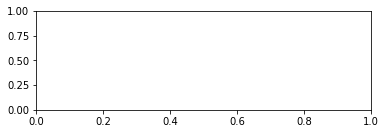

In [ ]:
plt.subplot(2,1,1)
plt.plot(history.history['loss'], color='g')
plt.plot(history.history['val_loss'], color='r')
plt.title('loss')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'], color='g')
plt.plot(history.history['val_accuracy'], color ='r' )
plt.title('accuracy')
plt.tight_layout()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
def plot_confusion_matrix(cm, classes=['0','1'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




### Prediction stuffs

In [ ]:
model.evaluate(test_gen, steps= len(test_data)//10)

0.4983346462249756
24/38 [=================>............] - ETA: 6s - loss: 1.7697 - accuracy: 0.130211.36965012550354
0.4917573928833008
38/38 [==============================] - 18s 476ms/step - loss: 1.7649 - accuracy: 0.1383
7.119435787200928


[1.764934778213501, 0.13827992975711823]

In [ ]:
model.evaluate(val_gen, steps= len(val_data)//10)

43/43 [==============================] - 28s 672ms/step - loss: 1.3743 - accuracy: 0.3628


[1.3742914199829102, 0.36279070377349854]

In [ ]:
confusion = confusion_matrix(,model.predict(val_gen))
report = classification_report(X1,X2)

In [ ]:
import pandas as pd
pd.read_csv('/content/drive/MyDrive/winno_data/dataset.csv')['label'].value_counts()

book           39
drink          33
computer       29
before         26
chair          25
               ..
fingerspell     4
little bit      4
meaning         3
tv              3
grey            2
Name: label, Length: 2000, dtype: int64

In [ ]:
##### Models
# x is the input value of shape 
# for grayscale image (8, 64, 64, 1)
#(n, 8, 64, 64, 1)
# for coloured image(8, 64,64, 3)
# here 8 is number of frames
# so the argument shape for CRNN will be (64, 64, 3)
# Point to note is that (64, 64, 3) will hardly give some good results because it is very small and grayscale

class CRNN(Layer):
  def __init__(self, shape, num_classes, attention=False):
    super(CRNN, self).__init__()
    self.attention = attention
    self.network = Sequential()
    self.network.add(InputLayer(input_shape = shape))
    self.network.add(Conv2D(32, (3,3), strides = 2, activation= 'relu'))
    #self.network.add(Conv2D(32, (3,3), strides = 2, activation= 'relu'))
    #self.network.add(Dropout(rate = 0.3))
    #self.network.add(BatchNormalization())
    self.network.add(Conv2D(64, (3,3), activation='relu'))
    #self.network.add(Conv2D(64, (3,3), activation='relu'))
    self.network.add(MaxPooling2D(pool_size=(2,2)))
    #print(self.network.output.shape)
    #self.network.add(BatchNormalization())
    self.network.add(Conv2D(128, (3, 3), activation='relu'))
    #self.network.add(Conv2D(128, (3, 3), activation='relu'))
    self.network.add(MaxPooling2D(pool_size=(2, 2)))
    self.network.add(Flatten())
    self.network.add(Dense(128, activation='relu'))
    self.network.add(Dense(num_classes, activation='softmax'))
    #print(self.network.output.shape)
    self.rnn_input_shape = self.network.output.shape
    #self.network.add(LSTM(units = 512, input_shape = self.rnn_input_shape, return_sequences=True))
    self.rnn = LSTM(units = 512, return_sequences= True)
    self.dense = Sequential([
                             Flatten(),
                             Dense(128, activation='relu'),
                             Dense(num_classes, activation='softmax')
    ])
    if self.attention:
      self.attention_layer = Attention()

  def call(self, x):
    x= x[0]
    print("shape:", x.shape)
    conv_layers_output = []
    for i in range(x.shape[0]):
      inp = x[:, i, :, :, :]#.reshape((1, 64, 64, 3))
      out = self.network(inp)
      conv_layers_output.append(out)
    out = self.rnn(out)
    out = out.reshape(out.shape[1:])
    if self.attention:
      out = self.attention_layer([out])
      out = self.dense(out)
    else:
      out = self.dense(out)
    
    return out

